# %% [Load Libraries]

In [64]:
import numpy as np 
import pandas as pd 
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [65]:
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

print("The output is:" + color.YELLOW + 'Python 3!')

The output is:Python 3!


# %% [SECTION_1 Load Files]

In [66]:
df=pd.read_csv("alzheimer.csv")
df.head(1)

,Group,M/F,Age,EDUC (Years of education),SES,MMSE,CDR,eTIV,nWBV,ASF
0,Nondemented,M,87,14,2.0,27.0,0.0,1987,0.696,0.883


In [67]:
df = df.rename(columns = {'M/F' : 'Gender' })
df = df.rename(columns = {'EDUC (Years of education)' : 'EDUC' })
df.columns
df.isnull().sum()

Group      0
Gender     0
Age        0
EDUC       0
SES       19
MMSE       2
CDR        0
eTIV       0
nWBV       0
ASF        0
dtype: int64

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Group   373 non-null    object 
 1   Gender  373 non-null    object 
 2   Age     373 non-null    int64  
 3   EDUC    373 non-null    int64  
 4   SES     354 non-null    float64
 5   MMSE    371 non-null    float64
 6   CDR     373 non-null    float64
 7   eTIV    373 non-null    int64  
 8   nWBV    373 non-null    float64
 9   ASF     373 non-null    float64
dtypes: float64(5), int64(3), object(2)
memory usage: 29.3+ KB


In [69]:
df.isnull().sum()

Group      0
Gender     0
Age        0
EDUC       0
SES       19
MMSE       2
CDR        0
eTIV       0
nWBV       0
ASF        0
dtype: int64

In [70]:
df['Group'].value_counts()

Nondemented    190
Demented       146
Converted       37
Name: Group, dtype: int64

In [71]:
df.isnull().mean()

Group     0.000000
Gender    0.000000
Age       0.000000
EDUC      0.000000
SES       0.050938
MMSE      0.005362
CDR       0.000000
eTIV      0.000000
nWBV      0.000000
ASF       0.000000
dtype: float64

In [72]:
#One hot encoding (Group and Gender have nominal categorical data)
df['Group'] = df['Group'].apply(lambda x : 1 if x == 'Demented' else 0)
df['Gender'] = df['Gender'].apply(lambda x : 1 if x == 'M' else 0)
df=df.drop(df[df["Group"]=="Converted"].index)

In [73]:
df.std()

Group       0.488724
Gender      0.495592
Age         7.640957
EDUC        2.876339
SES         1.134005
MMSE        3.683244
CDR         0.374557
eTIV      176.139286
nWBV        0.037135
ASF         0.138092
dtype: float64

In [74]:
df['SES'] = df['SES'].fillna(df['SES'].median())
df['MMSE'] = df['MMSE'].fillna(df['MMSE'].mean())

In [75]:
df.isnull().sum()

Group     0
Gender    0
Age       0
EDUC      0
SES       0
MMSE      0
CDR       0
eTIV      0
nWBV      0
ASF       0
dtype: int64

In [76]:
df.groupby('Group').mean()

,Gender,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
Group,,,,,,,,,
0,0.325991,77.497797,15.193833,2.286344,29.136564,0.046256,1489.594714,0.738101,1.194542
1,0.589041,76.260274,13.671233,2.671233,24.552634,0.671233,1485.849315,0.716301,1.196890


# %% [SECTION_2 Correlation Multicolinearity]

In [77]:
#Coorelation
X = df.iloc[:, 1:10]
y = df.iloc[:, 1]
X.head()

,Gender,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,1,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,1,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,1,75,12,2.0,23.0,0.5,1678,0.736,1.046
3,1,76,12,2.0,28.0,0.5,1738,0.713,1.010
4,1,80,12,2.0,22.0,0.5,1698,0.701,1.034


In [78]:
# train test split to prevent overfitting part
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)
corrMatrix = X_train.corr()
corrMatrix

,Gender,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
Gender,1.000000,-0.057078,0.079938,-0.075417,-0.151134,0.177290,0.556862,-0.230506,-0.543566
Age,-0.057078,1.000000,-0.024833,-0.028582,0.035918,-0.000752,0.036978,-0.514603,-0.037997
EDUC,0.079938,-0.024833,1.000000,-0.703638,0.189396,-0.146171,0.274697,0.000147,-0.250276
SES,-0.075417,-0.028582,-0.703638,1.000000,-0.105739,0.030023,-0.310372,0.105989,0.292824
MMSE,-0.151134,0.035918,0.189396,-0.105739,1.000000,-0.680727,-0.059891,0.362692,0.066819
CDR,0.177290,-0.000752,-0.146171,0.030023,-0.680727,1.000000,0.054272,-0.363391,-0.054965
eTIV,0.556862,0.036978,0.274697,-0.310372,-0.059891,0.054272,1.000000,-0.232931,-0.989417
nWBV,-0.230506,-0.514603,0.000147,0.105989,0.362692,-0.363391,-0.232931,1.000000,0.239255
ASF,-0.543566,-0.037997,-0.250276,0.292824,0.066819,-0.054965,-0.989417,0.239255,1.000000


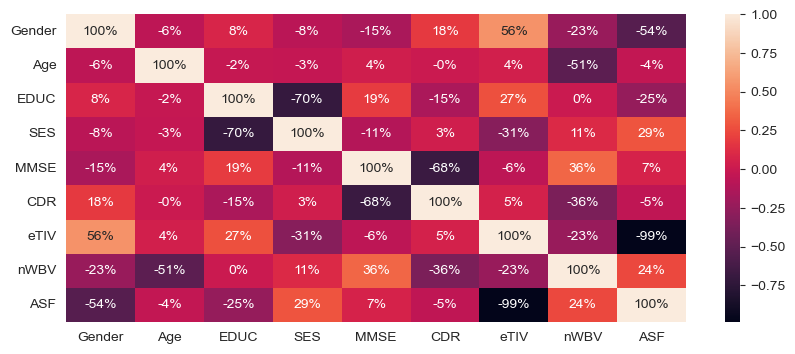

In [79]:
# pairwise correlation heatmap of the columns
#correlation = df.corr()
plt.figure(figsize=(10,4))
sns.heatmap(corrMatrix,annot=True, fmt=".0%")
plt.show()

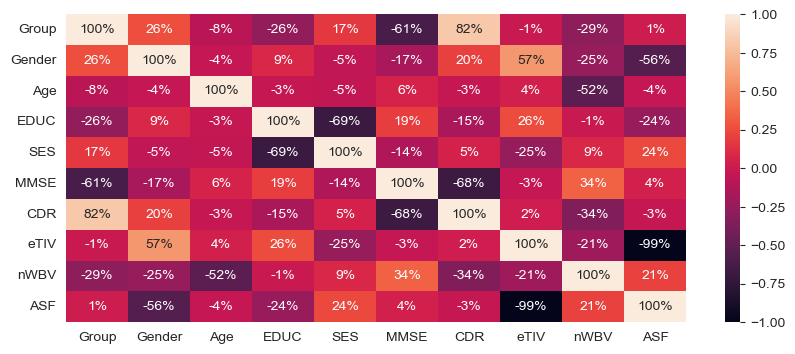

In [80]:
correlation = df.corr()
plt.figure(figsize=(10,4))
sns.heatmap(correlation,annot=True,vmin=-1,fmt=".0%")
plt.show()

In [81]:
#Multico
# if we do not use abs then we are not getting negative corelated feature
def correlation (df, threshold):
    correlated_col = set()
    corr_matrix = df.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            #   if abs(corr_matrix.iloc[i,j]) > threshold:
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                correlated_col.add(colname)
    return correlated_col

In [82]:
# at 0.6 threshhold so CDR is highly coorelated should i remove it? 0.4 meand these variables have 40% coorelation
corr_features = correlation(df, 0.9)
corr_features 

{'ASF'}

In [83]:
# drop the columns
# X_train.drop(corr_features,axis=1)
df.drop(corr_features,axis=1)

,Group,Gender,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV
0,0,1,87,14,2.0,27.0,0.0,1987,0.696
1,0,1,88,14,2.0,30.0,0.0,2004,0.681
2,1,1,75,12,2.0,23.0,0.5,1678,0.736
3,1,1,76,12,2.0,28.0,0.5,1738,0.713
4,1,1,80,12,2.0,22.0,0.5,1698,0.701
...,...,...,...,...,...,...,...,...,...
368,1,1,82,16,1.0,28.0,0.5,1693,0.694
369,1,1,86,16,1.0,26.0,0.5,1688,0.675
370,0,0,61,13,2.0,30.0,0.0,1319,0.801
371,0,0,63,13,2.0,30.0,0.0,1327,0.796


# %% [SECTION_3 Multivariate Analysis]

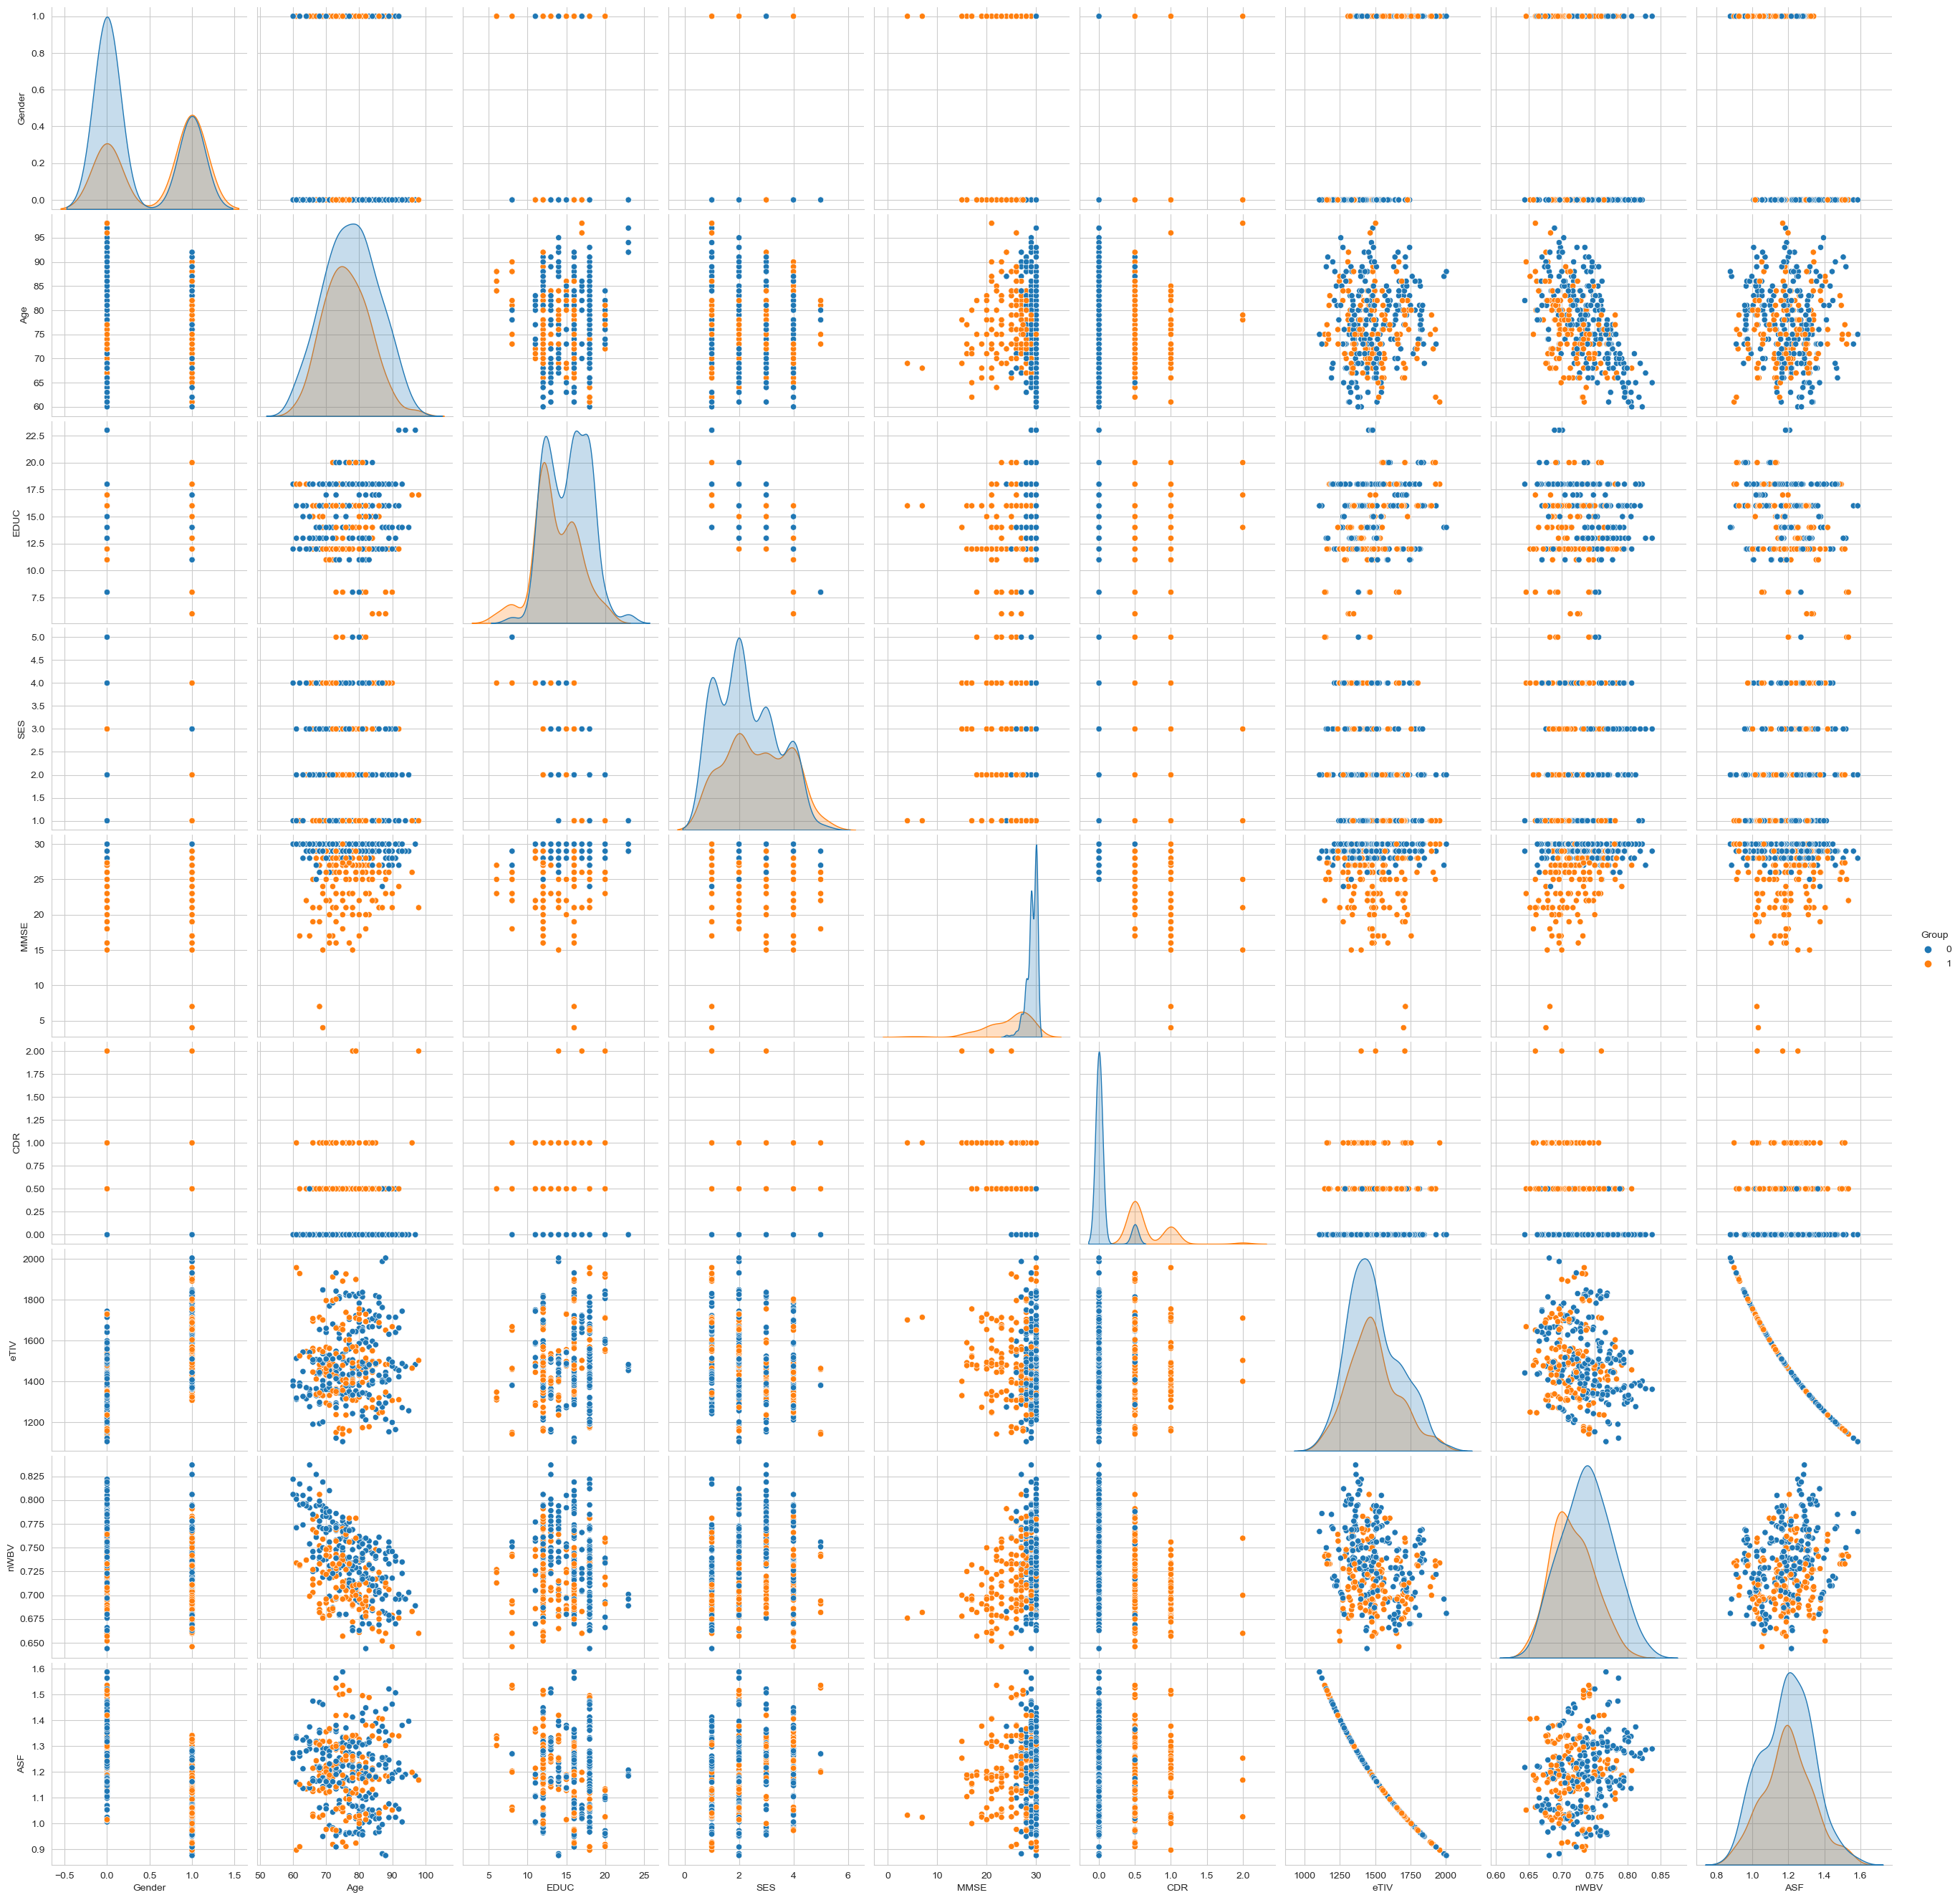

In [84]:
# distribution of target variable 
# Multivariate analysis
sns.set_style("whitegrid")
sns.pairplot(df,hue="Group",height=3)
plt.show()

# %% [SECTION_4 Outliers]

c:\Users\At\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\At\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\At\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\At\anaconda3\lib\site-packages\

iqr of  EDUC :  4.0
Upper limit EDUC :  22.0
Lower limit EDUC :  6.0
new_df  EDUC :       Group  Gender  Age  EDUC  SES  MMSE  CDR  eTIV   nWBV    ASF
107      0       0   92    23  1.0  29.0  0.0  1454  0.701  1.207
108      0       0   94    23  1.0  29.0  0.0  1474  0.696  1.190
109      0       0   97    23  1.0  30.0  0.0  1483  0.689  1.184 

iqr of  SES :  1.0
Upper limit SES :  4.5
Lower limit SES :  0.5
new_df  SES :       Group  Gender  Age  EDUC  SES  MMSE  CDR  eTIV   nWBV    ASF
136      1       0   78   8.0  5.0  23.0  1.0  1462  0.691  1.200
137      1       0   81   8.0  5.0  26.0  0.5  1459  0.694  1.203
138      1       0   82   8.0  5.0  18.0  0.5  1464  0.682  1.199
161      1       0   73   8.0  5.0  25.0  0.5  1151  0.743  1.525
162      1       0   75   8.0  5.0  22.0  0.5  1143  0.741  1.535
179      0       0   78   8.0  5.0  29.0  0.0  1383  0.756  1.269
180      0       0   80   8.0  5.0  27.0  0.0  1381  0.751  1.270 

iqr of  MMSE :  3.0
Upper limit MMSE : 

c:\Users\At\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\At\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\At\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


iqr of  CDR :  0.5
Upper limit CDR :  1.25
Lower limit CDR :  -0.75
new_df  CDR :       Group  Gender  Age  EDUC  SES  MMSE  CDR  eTIV  nWBV    ASF
184      1       0   98  17.0  1.0  22.5  2.0  1503  0.66  1.168
251      1       0   78  14.0  3.0  22.5  2.0  1401  0.70  1.253
330      1       1   79  20.0  1.0  25.0  2.0  1710  0.76  1.026 



c:\Users\At\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\At\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\At\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\At\anaconda3\lib\site-packages\

iqr of  eTIV :  240.0
Upper limit eTIV :  1957.0
Lower limit eTIV :  997.0
new_df  eTIV :     Group  Gender  Age  EDUC  SES  MMSE  CDR  eTIV   nWBV    ASF
0      0       1   87  14.0  2.0  27.0  0.0  1987  0.696  0.883
1      0       1   88  14.0  2.0  30.0  0.0  2004  0.681  0.876 

iqr of  nWBV :  0.05600000000000005
Upper limit nWBV :  0.8400000000000001
Lower limit nWBV :  0.6159999999999999
new_df  nWBV :  Empty DataFrame
Columns: [Group, Gender, Age, EDUC, SES, MMSE, CDR, eTIV, nWBV, ASF]
Index: [] 



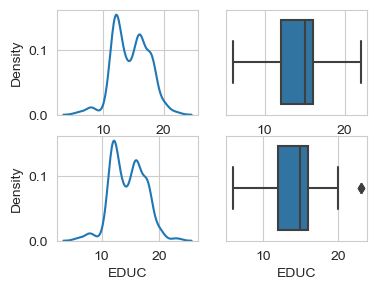

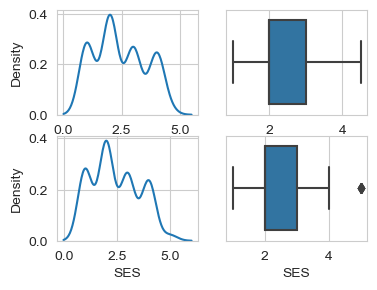

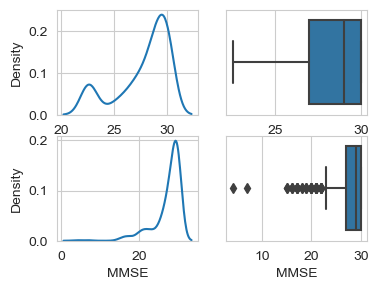

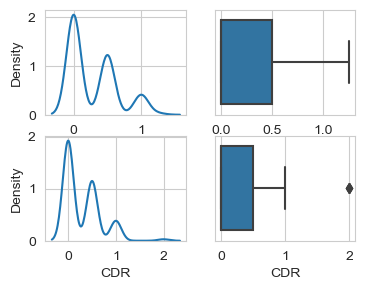

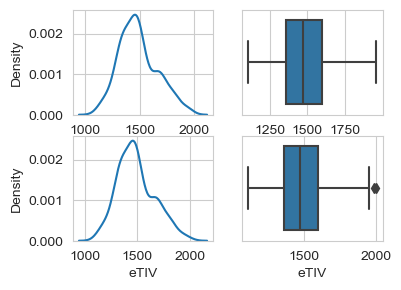

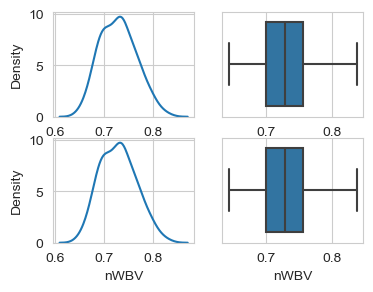

In [85]:
# Finding the IQR
outlier = ['EDUC', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV']
for i in (outlier):
    percentile25 = df[i].quantile(0.25)
    percentile75 = df[i].quantile(0.75)
    iqr = percentile75 - percentile25
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr
    df[df[i] < lower_limit]
    new_df = df[df[i] > upper_limit]
    # print('percentile75', percentile75 , '\n')
    # Comparing
    new_df_cap = df.copy()

    df[i] = np.where(
        df[i] > upper_limit,
        upper_limit,
        np.where(
            df[i] < lower_limit,
            lower_limit,
            df[i]
        )
    )
    # np.where(condtion,true,false)
    new_df_cap.shape
    # Comparing

    plt.figure(figsize=(4,3))
    plt.subplot(2,2,1)
    sns.kdeplot(df[i])

    plt.subplot(2,2,2)
    sns.boxplot(df[i])

    plt.subplot(2,2,3)
    sns.kdeplot(new_df_cap[i])

    plt.subplot(2,2,4)
    sns.boxplot(new_df_cap[i])


    print(color.YELLOW + "iqr of ", i, ": ",  iqr)
    print("Upper limit", i, ": " , upper_limit)
    print("Lower limit", i, ": " , lower_limit )
    print(color.GREEN + "new_df ", i, ": " , new_df , '\n')
    # print("The output is:" + color.YELLOW + 'Python 3!')


# %% [SECTION_6 Feature Distribution ]

C:\Users\At\AppData\Local\Temp\ipykernel_1332\1106433157.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


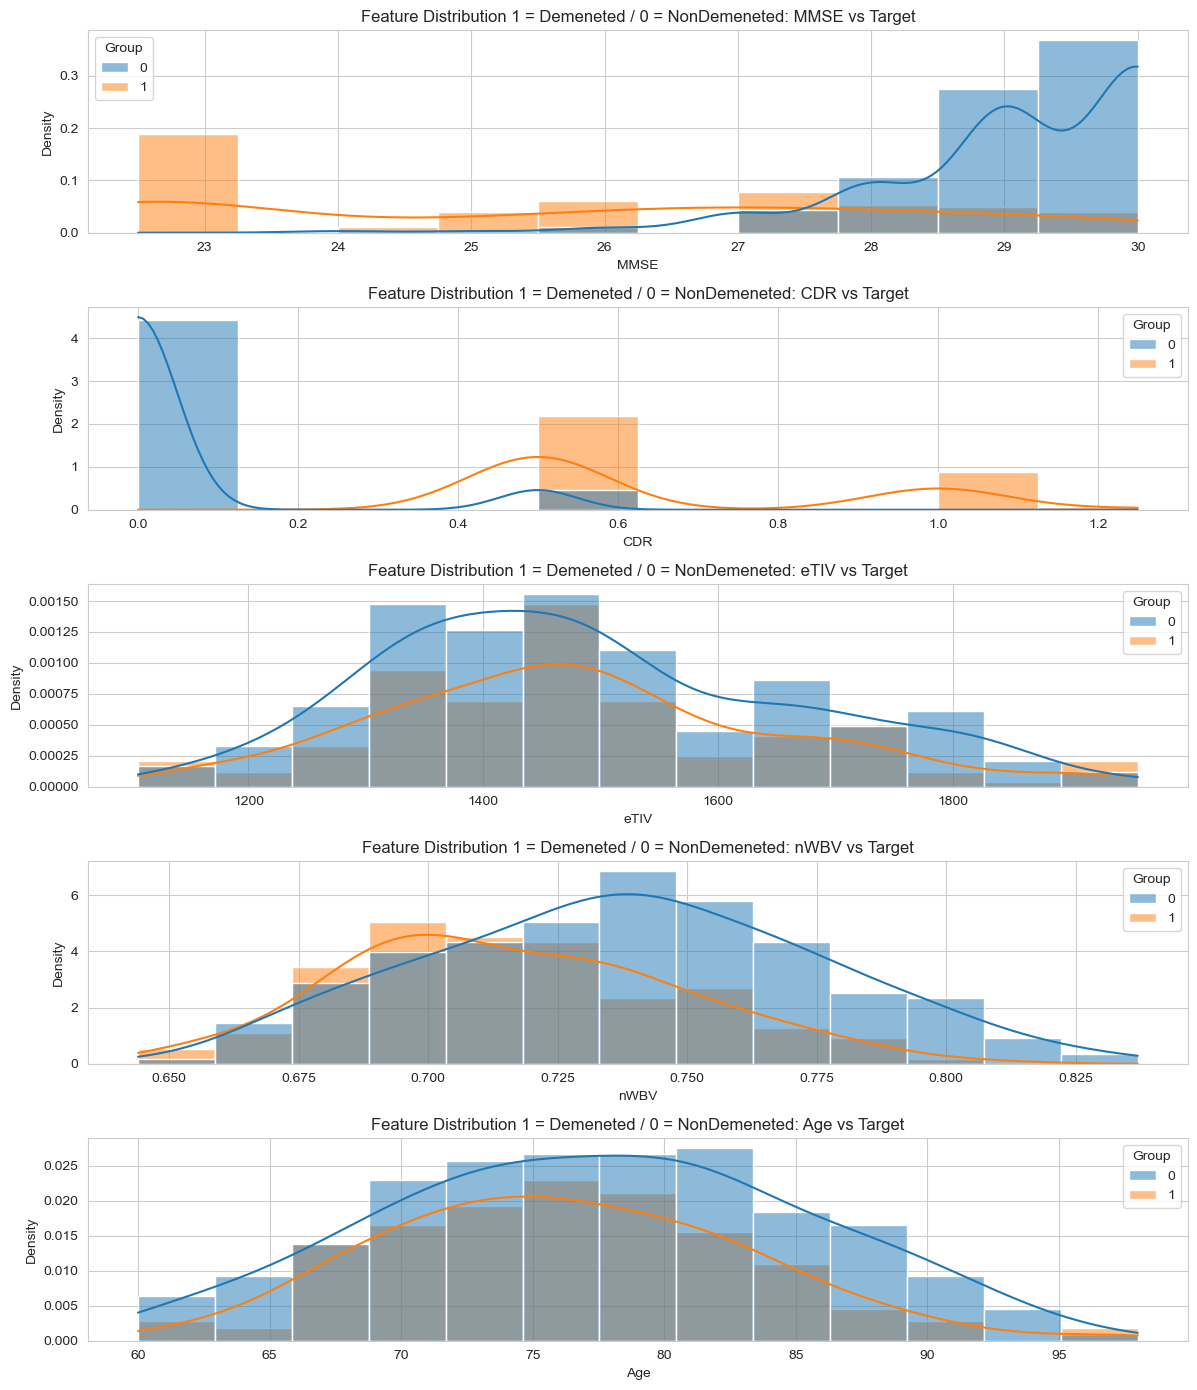

In [86]:
num_features = ['MMSE', 'CDR', 'eTIV', 'nWBV', 'Age']
fig, ax = plt.subplots(5, 1, figsize=(12,14))
ax = ax.flatten()
for i, col in enumerate(num_features):
    # ax[i].set_aspect(1)
    sns.histplot(data=df, x=col, hue='Group', stat='density', kde=True, ax=ax[i])
    ax[i].set_title(f'Feature Distribution 1 = Demeneted / 0 = NonDemeneted: {col} vs Target')
fig.tight_layout()
fig.show()

# %% [SECTION_7 MODALS ]

In [87]:
# Support vector machine model
svc = SVC(random_state=42, probability=True)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
print(confusion_matrix(y_test, y_pred))
svc.score(X_test, y_test)
# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

[[59  4]
 [26 23]]
Accuracy: 0.7321428571428571


In [88]:
# fit the logistic regression model
logReg = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
# evaluate the model on test data set
y_pred = logReg.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

[[59  4]
 [14 35]]
Accuracy: 0.8392857142857143


In [89]:
# random forest model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
rf.score(X_test, y_test)

[[63  0]
 [ 0 49]]


1.0

In [90]:
# add a Gradient Boosting Classifier 
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)
gbc.score(X_test, y_test)

1.0

In [91]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy_score(y_pred,y_test)
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        63
           1       1.00      1.00      1.00        49

    accuracy                           1.00       112
   macro avg       1.00      1.00      1.00       112
weighted avg       1.00      1.00      1.00       112



# %% [SECTION_8 K-Cross validation ]

In [92]:
#kf
from sklearn.model_selection import KFold
model=SVC()
kfold_validation=KFold(10)
import numpy as np
from sklearn.model_selection import cross_val_score
results=cross_val_score(model,X,y,cv=kfold_validation)
print(results)
print(np.mean(results))

[0.86842105 0.76315789 0.68421053 0.54054054 0.86486486 0.62162162
 0.89189189 0.91891892 0.83783784 0.72972973]
0.7721194879089617


In [93]:
from sklearn.neighbors import KNeighborsClassifier
# train the model
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
 
# compute accuracy of the model
knn.score(X_test, y_test)

0.7946428571428571

In [94]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[58,  5],
       [18, 31]], dtype=int64)